<a href="https://colab.research.google.com/github/tanakakao/test/blob/main/renshu_classication_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.applications.mobilenet_v3 import MobileNetV3Small
import keras
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

input_shape = (224,224,3)
num_classes = 1 # 2値分類なので1 多クラスであればクラス数

base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=input_shape)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(num_classes, activation='sigmoid')(x) # 多クラス:'softmax'

model = Model(inputs=base_model.input, outputs=output)
for layer in base_model.layers:
    layer.trainable = False


optimizer = Adam(lr=0.01)

model.compile(loss=['binary_crossentropy'],
              optimizer=optimizer,
              metrics=['accuracy'],) # 多クラス'categorical_crossentropy'

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Adadelta
Adagrad
Adam
Adamax
Ftrl
Nadam
RMSprop
SGD

Xception
VGG16
VGG19
ResNet50
InceptionV3
InceptionResNetV2
MobileNet
DenseNet
NASNet
MobileNetV2

In [113]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling_2[0][0]']            
                                )                                                                 
                                                                                            

In [114]:
for i, layer in enumerate(base_model.layers):
  print(str(i)+': ',layer)

0:  <keras.engine.input_layer.InputLayer object at 0x7feb6a0b7650>
1:  <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7feb6eb5ae10>
2:  <keras.layers.convolutional.Conv2D object at 0x7feaecad2c90>
3:  <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7feb6eb62590>
4:  <keras.layers.core.tf_op_layer.TFOpLambda object at 0x7feb6a0d7f90>
5:  <keras.layers.advanced_activations.ReLU object at 0x7feb6a0af990>
6:  <keras.layers.core.tf_op_layer.TFOpLambda object at 0x7feb6a0cd310>
7:  <keras.layers.merge.Multiply object at 0x7feb6a52a290>
8:  <keras.layers.convolutional.ZeroPadding2D object at 0x7feaabe66c50>
9:  <keras.layers.convolutional.DepthwiseConv2D object at 0x7feb6a0a8e50>
10:  <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7feaec8160d0>
11:  <keras.layers.advanced_activations.ReLU object at 0x7feb6a0cdf90>
12:  <keras.layers.pooling.GlobalAveragePooling2D object at 0x7feb6a0d7510>
13:  <keras.layers.

In [105]:
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0.01,
                          patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            verbose=1, 
                                            factor=0.1,
                                            min_lr=0.00001)
# callback
callbacks = [earlystop, learning_rate_reduction]

- featurewise_center: 真理値．データセット全体で，入力の平均を0にします．
- samplewise_center: 真理値．各サンプルの平均を0にします．
- featurewise_std_normalization: 真理値．入力をデータセットの標準偏差で正規化します．
- samplewise_std_normalization: 真理値．各入力をその標準偏差で正規化します．
- zca_epsilon: ZCA白色化のイプシロン．デフォルトは1e-6．
- zca_whitening: 真理値．ZCA白色化を適用します．
- rotation_range: 整数．画像をランダムに回転する回転範囲．
- width_shift_range: 浮動小数点数（横幅に対する割合）．ランダムに水平シフトする範囲．
- height_shift_range: 浮動小数点数（縦幅に対する割合）．ランダムに垂直シフトする範囲．
- shear_range: 浮動小数点数．シアー強度（反時計回りのシアー角度）．
- zoom_range: 浮動小数点数または[lower，upper]．ランダムにズームする範囲．浮動小数点数が与えられた場合，[lower, upper] = [1-zoom_range, 1+zoom_range]です．
- channel_shift_range: 浮動小数点数．ランダムにチャンネルをシフトする範囲．
- fill_mode: {"constant", "nearest", "reflect", "wrap"}のいずれか．デフォルトは 'nearest'です．指定されたモードに応じて，入力画像の境界周りを埋めます．
"constant": kkkkkkkk|abcd|kkkkkkkk (cval=k)
"nearest": aaaaaaaa|abcd|dddddddd
"reflect": abcddcba|abcd|dcbaabcd
"wrap": abcdabcd|abcd|abcdabcd
- cval: 浮動小数点数または整数．fill_mode = "constant"のときに境界周辺で利用される値．
- horizontal_flip: 真理値．水平方向に入力をランダムに反転します．
- vertical_flip: 真理値．垂直方向に入力をランダムに反転します．
- rescale: 画素値のリスケーリング係数．デフォルトはNone．Noneか0ならば，適用しない．それ以外であれば，(他の変換を行う前に) 与えられた値をデータに積算する．
- preprocessing_function: 各入力に適用される関数です．この関数は他の変更が行われる前に実行されます．この関数は3次元のNumpyテンソルを引数にとり，同じshapeのテンソルを出力するように定義する必要があります．
- data_format: {"channels_first", "channels_last"}のどちらか．"channels_last"の場合，入力のshapeは(samples, height, width, channels)となり，"channels_first"の場合は(samples, channels, height, width)となります．デフォルトはKerasの設定ファイル~/.keras/keras.jsonの- image_data_formatの値です．一度も値を変更していなければ，"channels_last"になります．
- validation_split: 浮動小数点数．検証のために予約しておく画像の割合（厳密には0から1の間）です．

In [106]:
img_height = 224
img_width = 224

classes = ['hitachi', 'komatsu']

train_datagen = ImageDataGenerator(
        preprocessing_function = keras.applications.mobilenet_v3.preprocess_input)

test_datagen = ImageDataGenerator( preprocessing_function = keras.applications.mobilenet_v3.preprocess_input)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/test/train',
        target_size=(img_height, img_width),
        color_mode = 'rgb', #グレー:'grayscale'
        batch_size=16,
        classes = classes, 
        class_mode='binary'#2つ'binary' 3つ以上:'categorical'
)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/test/validation',
        target_size=(img_height, img_width),
        batch_size=16,
        classes = classes, 
        class_mode='binary')

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks)

Found 500 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/10
32/32 [==============================] - 11s 267ms/step - loss: 1.6941 - accuracy: 0.5960 - val_loss: 0.4910 - val_accuracy: 0.8429 - lr: 0.0100
Epoch 2/10
32/32 [==============================] - 7s 235ms/step - loss: 0.2825 - accuracy: 0.8960 - val_loss: 0.0251 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/10
32/32 [==============================] - 8s 237ms/step - loss: 0.0914 - accuracy: 0.9600 - val_loss: 0.0162 - val_accuracy: 0.9929 - lr: 0.0100
Epoch 4/10
32/32 [==============================] - 8s 238ms/step - loss: 0.2483 - accuracy: 0.9480 - val_loss: 0.0391 - val_accuracy: 0.9929 - lr: 0.0100
Epoch 5/10
32/32 [==============================] - 8s 235ms/step - loss: 0.1666 - accuracy: 0.9500 - val_loss: 0.0367 - val_accuracy: 0.9929 - lr: 0.0100
Epoch 6/10
32/32 [==============================] - 8s 238ms/step - loss: 0.1337 - accuracy: 0.9580 - val_loss: 0.0085 - val_accuracy: 1.0000 

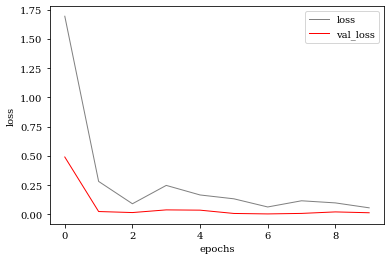

In [107]:
loss = history.history['loss']
val_loss = history.history['val_loss']
    
fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(loss)), loss, color='gray', linewidth=1, label='loss')
plt.plot(range(len(val_loss)), val_loss, color='red', linewidth=1, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

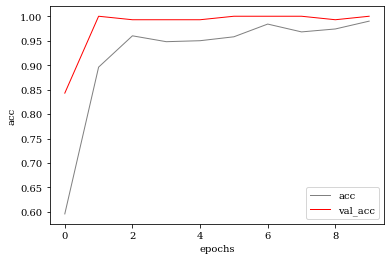

In [108]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
    
fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(acc)), acc, color='gray', linewidth=1, label='acc')
plt.plot(range(len(val_acc)), val_acc, color='red', linewidth=1, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


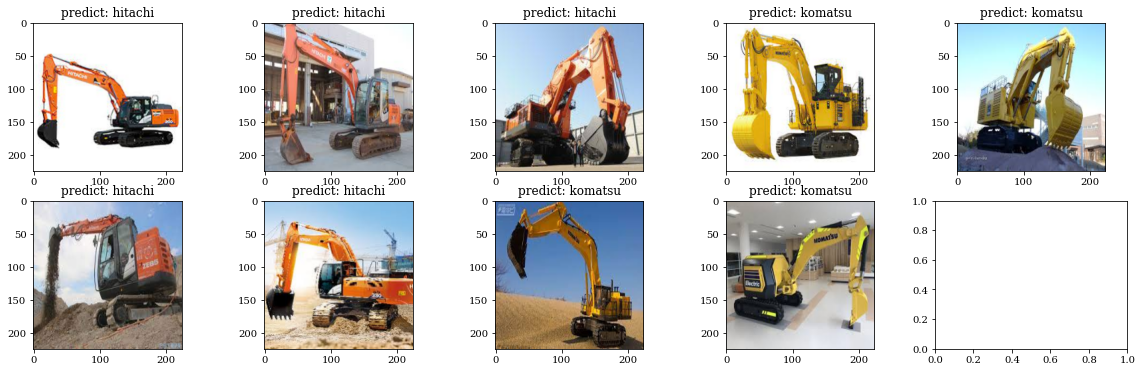

In [110]:
imgs = np.array([cv2.cvtColor(cv2.resize(cv2.imread('/content/drive/MyDrive/test/test/test00'+str(i)+'.jpg'), (224,224)), cv2.COLOR_BGR2RGB) for i in range(1,10)])
imgs = keras.applications.mobilenet_v3.preprocess_input(imgs)

pred = (model(imgs) >= 0.5).numpy()
pred = np.array(list(map(lambda x: 'hitachi' if not x else 'komatsu', pred)))

fig, ax = plt.subplots(2,5,figsize=(20,6))

for i in range(9):
  ax[i%2][i//2].imshow(imgs[i])
  ax[i%2][i//2].set_title('predict: '+pred[i])

In [116]:
from keras import backend as K
import tensorflow as tf
import cv2

K.set_learning_phase(1) #set learning phase

def Grad_Cam(input_model, pic_array, layer_name):
    pic_array = pic_array.reshape(224,224,3)
    X = np.expand_dims(pic_array, axis=0)
    preprocessed_input = X.astype('float32')# / 255.0    

    grad_model = Model([input_model.inputs], [input_model.get_layer(index=layer_name).output, input_model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(preprocessed_input)
        class_idx = np.argmax(predictions[0])
        loss = predictions[:, class_idx]

    output = conv_outputs[0]
    grads = tape.gradient(loss, conv_outputs)[0]

    gate_f = tf.cast(output > 0, 'float32')
    gate_r = tf.cast(grads > 0, 'float32')

    guided_grads = gate_f * gate_r * grads

    # 重みを平均化して、レイヤーの出力に乗じる
    weights = np.mean(guided_grads, axis=(0, 1))
    cam = np.dot(output, weights)

    # 画像化してヒートマップにして合成
    cam = cv2.resize(cam, (224, 224), cv2.INTER_LINEAR) 
    cam = np.maximum(cam, 0) 
    cam = cam / cam.max()

    jetcam = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)  # モノクロ画像に疑似的に色をつける
    jetcam = cv2.cvtColor(jetcam, cv2.COLOR_BGR2RGB)  # 色をRGBに変換
    pic = cv2.cvtColor(pic_array.reshape(224,224,3), cv2.COLOR_BGR2RGB)  # 色をRGBに変換
    jetcam = (np.float32(jetcam)*0.4 + pic*255)/2 # もとの画像に合成
    return np.uint8(jetcam), cam

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


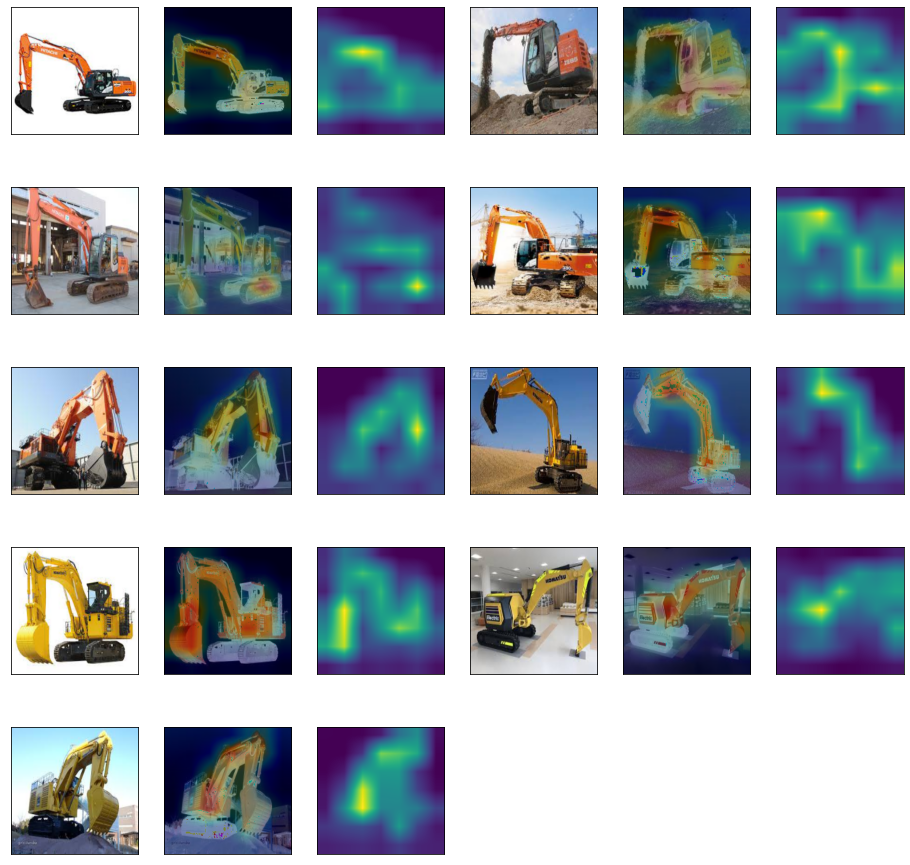

In [121]:
fig = plt.figure(figsize=(16, 16))
#last_conv_layer = model.get_layer('multiply_32')  
last_conv_layer = model.get_layer(index=len(base_model.layers)-1)
i = 1
for img in imgs:
    heatmap, superimposed = Grad_Cam(model, img, len(base_model.layers)-1)

    subplot = fig.add_subplot(5, 6, i)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(img.reshape(224, 224,3), vmin=0, vmax=1, cmap=plt.cm.gray_r)

    subplot = fig.add_subplot(5, 6, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(heatmap, vmin=0, vmax=1, cmap=plt.cm.gray_r)

    subplot = fig.add_subplot(5, 6, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(superimposed)
  
    i += 3

In [127]:
input_shape = (224,224,3)
num_classes = 1 # 2値分類なので1 多クラスであればクラス数

base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=input_shape)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
output = Dense(num_classes, activation='sigmoid')(x) # 多クラス:'softmax'

model = Model(inputs=base_model.input, outputs=output)

optimizer = Adam(lr=0.01)

model.compile(loss=['binary_crossentropy'],
              optimizer=optimizer,
              metrics=['accuracy'],) # 多クラス'categorical_crossentropy'

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [126]:
img_height = 224
img_width = 224

classes = ['hitachi', 'komatsu']

train_datagen = ImageDataGenerator(
        preprocessing_function = keras.applications.mobilenet_v3.preprocess_input,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True

)

test_datagen = ImageDataGenerator( preprocessing_function = keras.applications.mobilenet_v3.preprocess_input)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/test/train',
        target_size=(img_height, img_width),
        color_mode = 'rgb', #グレー:'grayscale'
        batch_size=16,
        classes = classes, 
        class_mode='binary'#2つ'binary' 3つ以上:'categorical'
)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/test/validation',
        target_size=(img_height, img_width),
        batch_size=16,
        classes = classes, 
        class_mode='binary')

Found 500 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [128]:
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0.01,
                          patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            verbose=1, 
                                            factor=0.1,
                                            patience=5,
                                            min_lr=0.00001)
# callback
callbacks = [earlystop, learning_rate_reduction]

In [129]:
history = model.fit(
        train_generator,
        epochs=70,
        validation_data=validation_generator,
        callbacks=callbacks)

Epoch 1/70
32/32 [==============================] - 18s 432ms/step - loss: 1.0531 - accuracy: 0.7100 - val_loss: 62202.2227 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 2/70
32/32 [==============================] - 12s 380ms/step - loss: 0.2005 - accuracy: 0.9180 - val_loss: 498744.2188 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 3/70
32/32 [==============================] - 12s 387ms/step - loss: 0.2196 - accuracy: 0.9480 - val_loss: 626201.8750 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 4/70
32/32 [==============================] - 12s 388ms/step - loss: 0.1802 - accuracy: 0.9600 - val_loss: 1389176.1250 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 5/70
32/32 [==============================] - 12s 390ms/step - loss: 0.1784 - accuracy: 0.9500 - val_loss: 264667.8438 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 6/70
32/32 [==============================] - ETA: 0s - loss: 0.0742 - accuracy: 0.9760
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
32/32 [==================

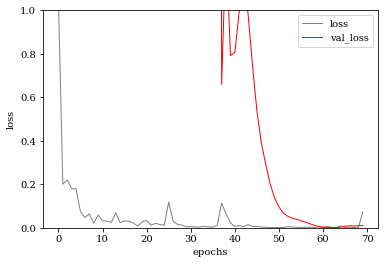

In [130]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
    
fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(loss)), loss, color='gray', linewidth=1, label='loss')
plt.plot(range(len(val_loss)), val_loss, color='red', linewidth=1, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.ylim(0, 1)
plt.show()

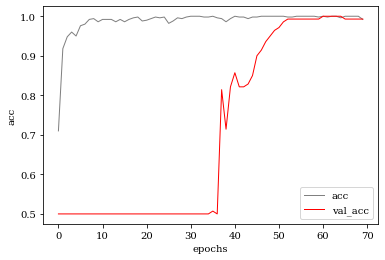

In [131]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
    
fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(acc)), acc, color='gray', linewidth=1, label='acc')
plt.plot(range(len(val_acc)), val_acc, color='red', linewidth=1, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [147]:
import tensorflow_hub as hub

model = tf.keras.Sequential([
                             hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5", trainable=True),
                             #GlobalAveragePooling2D(),
                             Dense(512, activation='relu'),
                             Dropout(0.5),
                             Dense(256, activation='relu'),
                             Dropout(0.5),
                             Dense(64, activation='relu'),
                             Dense(num_classes, activation='sigmoid')
                             ])

optimizer = Adam(lr=0.01)

model.compile(loss=['binary_crossentropy'],
              optimizer=optimizer,
              metrics=['accuracy'],) # 多クラス'categorical_crossentropy'

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [148]:
def preprocess_input(img):
  img = 2*(img - img.min())/(img.max()-img.min()) - 1
  return img

img_height = 224
img_width = 224

classes = ['hitachi', 'komatsu']

train_datagen = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True

)

test_datagen = ImageDataGenerator( preprocessing_function = preprocess_input)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/test/train',
        target_size=(img_height, img_width),
        color_mode = 'rgb', #グレー:'grayscale'
        batch_size=16,
        classes = classes, 
        class_mode='binary'#2つ'binary' 3つ以上:'categorical'
)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/test/validation',
        target_size=(img_height, img_width),
        batch_size=16,
        classes = classes, 
        class_mode='binary')

Found 500 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [145]:
model.build((None, 224, 224, 3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1024)              1026552   
                                                                 
 dense_277 (Dense)           (None, 512)               524800    
                                                                 
 dropout_19 (Dropout)        (None, 512)               0         
                                                                 
 dense_278 (Dense)           (None, 256)               131328    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_279 (Dense)           (None, 64)                16448     
                                                                 
 dense_280 (Dense)           (None, 1)                

In [149]:
history = model.fit(
        train_generator,
        epochs=70,
        validation_data=validation_generator,
        callbacks=callbacks)

Epoch 1/70
32/32 [==============================] - 21s 425ms/step - loss: 1.6920 - accuracy: 0.5180 - val_loss: 11.0730 - val_accuracy: 0.5500 - lr: 0.0100
Epoch 2/70
32/32 [==============================] - 14s 427ms/step - loss: 0.7960 - accuracy: 0.7360 - val_loss: 6.0824 - val_accuracy: 0.8071 - lr: 0.0100
Epoch 3/70
32/32 [==============================] - 13s 401ms/step - loss: 0.5642 - accuracy: 0.9360 - val_loss: 115.4350 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 4/70
32/32 [==============================] - 13s 411ms/step - loss: 0.9463 - accuracy: 0.7580 - val_loss: 0.9632 - val_accuracy: 0.8071 - lr: 0.0100
Epoch 5/70
32/32 [==============================] - 14s 426ms/step - loss: 0.8890 - accuracy: 0.8520 - val_loss: 26.5733 - val_accuracy: 0.5714 - lr: 0.0100
Epoch 6/70
32/32 [==============================] - 13s 398ms/step - loss: 0.7830 - accuracy: 0.8700 - val_loss: 1175.7936 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 7/70
32/32 [==============================] - 13s 3

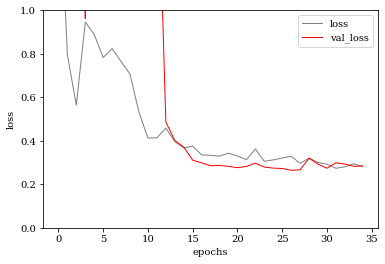

In [152]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
    
fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(loss)), loss, color='gray', linewidth=1, label='loss')
plt.plot(range(len(val_loss)), val_loss, color='red', linewidth=1, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.ylim(0, 1)
plt.show()

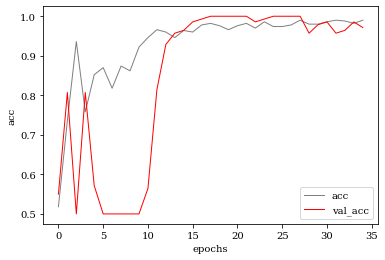

In [153]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
    
fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(acc)), acc, color='gray', linewidth=1, label='acc')
plt.plot(range(len(val_acc)), val_acc, color='red', linewidth=1, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [150]:
import numpy as np
import cv2
import tensorflow as tf

imgs = np.array([cv2.cvtColor(cv2.resize(cv2.imread('/content/drive/MyDrive/test/test/test00'+str(i)+'.jpg'), (224,224)), cv2.COLOR_BGR2RGB) for i in range(1,10)])
imgs = keras.applications.mobilenet_v3.preprocess_input(imgs)

pred = (model(tf.constant(imgs)) >= 0.5).numpy()
pred = np.array(list(map(lambda x: 'hitachi' if not x else 'komatsu', pred)))

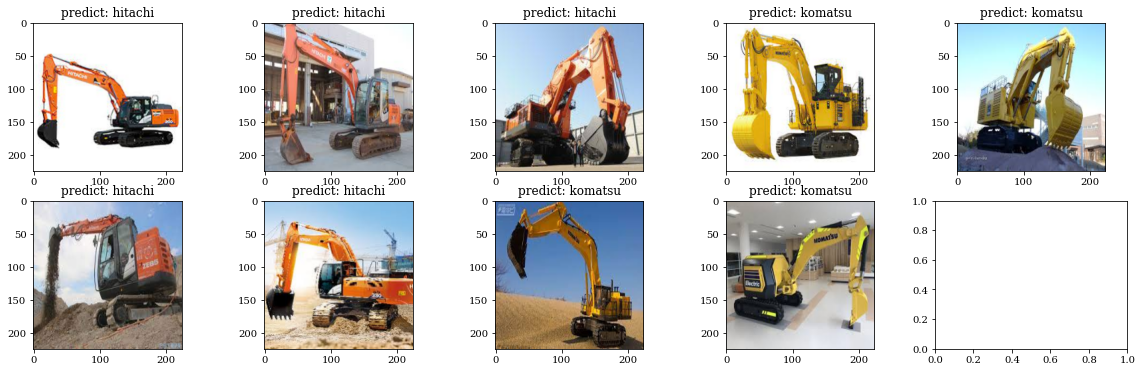

In [151]:
fig, ax = plt.subplots(2,5,figsize=(20,6))

for i in range(9):
  ax[i%2][i//2].imshow(imgs[i])
  ax[i%2][i//2].set_title('predict: '+pred[i])

In [155]:
from tensorflow.keras.layers import Input, Conv2D, Activation, BatchNormalization, DepthwiseConv2D, Add, Multiply, ReLU
from keras.layers.merge import concatenate
from tensorflow.keras import backend as K

def hard_sigmoid(x):
    return ReLU(6.)(x + 3.) * (1. / 6.)

def hard_swish(x):
    return Multiply()([Activation(hard_sigmoid)(x), x])

class SE_Block(Model):
    def __init__(self, in_channels, r=0.25):
        super().__init__()
        self.pool = GlobalAveragePooling2D()
        self.fc1 = Dense(int(in_channels*r))
        self.relu = Activation(hard_sigmoid)
        self.fc2 = Dense(in_channels, activation='sigmoid')
    
    def call(self, x):
        out = self.pool(x)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = Multiply()([out,x])
        return out

class mobilenetv3_block(Model):
    def __init__(self, exp_size, out_channels, kernel, SE, NL, s, r=0.25):
        super().__init__()        
        if NL == 'HS':
            activation = hard_swish
        else:
            activation = "relu"
        
        self.conv1 = Conv2D(filters = int(exp_size), kernel_size = (1,1), padding = 'same')
        self.bn1 = BatchNormalization()
        self.relu1 = Activation(activation)
    
        self.conv2 = DepthwiseConv2D(kernel_size = kernel, strides=s, padding = 'same')
        self.bn2 = BatchNormalization()
        self.relu2 = Activation(activation)

        self.conv3 = Conv2D(filters = out_channels, kernel_size = (1,1), padding = 'same')
        self.bn3 = BatchNormalization()
        self.relu3 = Activation(activation)
        
        if SE:
            self.se = SE_Block(in_channels=out_channels, r=r)
        else:
            self.se = None
        
        if s == 1:
          self.add = Add()
        else:
          self.add = None
    
    def call(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        
        out = self.conv3(out)
        out = self.bn3(out)
        out = self.relu3(out)

        if self.se is not None:
            out = self.se(out)
        
        if K.int_shape(out) == K.int_shape(x):
           if self.add is not None:
             out = self.add([out, x])
            
        return out

In [156]:
class MobileNetV3_Small(Model):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2D(16, kernel_size=3, strides=2, padding='same')
        self.bn1 = BatchNormalization()
        self.relu1 = Activation(hard_swish)
        
        self.bneck1  = mobilenetv3_block(exp_size=16,  out_channels=16, kernel=3, SE=True,  NL='RE', s=2)
        self.bneck2  = mobilenetv3_block(exp_size=72,  out_channels=24, kernel=3, SE=False, NL='RE', s=2)
        self.bneck3  = mobilenetv3_block(exp_size=88,  out_channels=24, kernel=3, SE=False, NL='RE', s=1)
        self.bneck4  = mobilenetv3_block(exp_size=96,  out_channels=40, kernel=5, SE=True,  NL='HS', s=2)
        self.bneck5  = mobilenetv3_block(exp_size=240, out_channels=40, kernel=5, SE=True,  NL='HS', s=1)
        self.bneck6  = mobilenetv3_block(exp_size=240, out_channels=40, kernel=5, SE=True,  NL='HS', s=1)
        self.bneck7  = mobilenetv3_block(exp_size=120, out_channels=48, kernel=5, SE=True,  NL='HS', s=1)
        self.bneck8  = mobilenetv3_block(exp_size=144, out_channels=48, kernel=5, SE=True,  NL='HS', s=1)
        self.bneck9  = mobilenetv3_block(exp_size=288, out_channels=96, kernel=5, SE=True,  NL='HS', s=2)
        self.bneck10 = mobilenetv3_block(exp_size=576, out_channels=96, kernel=5, SE=True,  NL='HS', s=1)
        self.bneck11 = mobilenetv3_block(exp_size=576, out_channels=96, kernel=5, SE=True,  NL='HS', s=1)
       
        self.conv2 = Conv2D(576, kernel_size=1, strides=1, padding='same')
        self.bn2 = BatchNormalization()
        self.relu2 = Activation(hard_swish)
        
        self.pool = GlobalAveragePooling2D()
        self.fc1 = Dense(1024)
        self.relu3 = Activation(hard_sigmoid)
        self.fc2 = Dense(1, activation='sigmoid')
        
    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        
        x = self.bneck1(x)
        x = self.bneck2(x)
        x = self.bneck3(x)
        x = self.bneck4(x)
        x = self.bneck5(x)
        x = self.bneck6(x)
        x = self.bneck7(x)
        x = self.bneck8(x)
        x = self.bneck9(x)
        x = self.bneck10(x)
        x = self.bneck11(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        
        x = self.pool(x)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

In [157]:
model = MobileNetV3_Small()

optimizer = Adam(lr=0.01)

model.compile(loss=['binary_crossentropy'],
              optimizer=optimizer,
              metrics=['accuracy'],) # 多クラス'categorical_crossentropy'
#model.build((None, 224, 224, 3))  # build with input shape.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [158]:
img_height = 224
img_width = 224

classes = ['hitachi', 'komatsu']

train_datagen = ImageDataGenerator(
        preprocessing_function = keras.applications.mobilenet_v3.preprocess_input,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True

)

test_datagen = ImageDataGenerator( preprocessing_function = keras.applications.mobilenet_v3.preprocess_input)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/test/train',
        target_size=(img_height, img_width),
        color_mode = 'rgb', #グレー:'grayscale'
        batch_size=16,
        classes = classes, 
        class_mode='binary'#2つ'binary' 3つ以上:'categorical'
)

validation_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/test/validation',
        target_size=(img_height, img_width),
        batch_size=16,
        classes = classes, 
        class_mode='binary')

Found 500 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [159]:
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0.01,
                          patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            verbose=1, 
                                            factor=0.1,
                                            patience=3,
                                            min_lr=0.00001)
# callback
callbacks = [earlystop, learning_rate_reduction]

history = model.fit(
        train_generator,
        steps_per_epoch=31,
        epochs=200,
        validation_data=validation_generator,
        callbacks=callbacks)

Epoch 1/200
31/31 [==============================] - 23s 488ms/step - loss: 0.8204 - accuracy: 0.6529 - val_loss: 1.2131 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 2/200
31/31 [==============================] - 12s 403ms/step - loss: 0.3028 - accuracy: 0.8698 - val_loss: 0.8575 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 3/200
31/31 [==============================] - 14s 440ms/step - loss: 0.2795 - accuracy: 0.9070 - val_loss: 0.6964 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 4/200
31/31 [==============================] - 13s 414ms/step - loss: 0.2727 - accuracy: 0.9070 - val_loss: 0.7755 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 5/200
31/31 [==============================] - 12s 401ms/step - loss: 0.2531 - accuracy: 0.9112 - val_loss: 1.2235 - val_accuracy: 0.5000 - lr: 0.0100
Epoch 6/200
31/31 [==============================] - ETA: 0s - loss: 0.2993 - accuracy: 0.9298
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
31/31 [==============================] - 12s

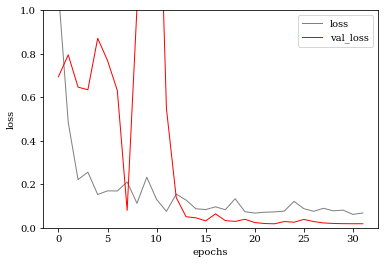

In [39]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
    
fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(loss)), loss, color='gray', linewidth=1, label='loss')
plt.plot(range(len(val_loss)), val_loss, color='red', linewidth=1, label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.ylim(0, 1)
plt.show()

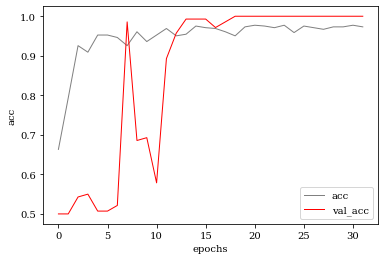

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
    
fig = plt.figure()
plt.rc('font', family='serif')
plt.plot(range(len(acc)), acc, color='gray', linewidth=1, label='acc')
plt.plot(range(len(val_acc)), val_acc, color='red', linewidth=1, label='val_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [97]:
import numpy as np
import cv2

imgs = np.array([cv2.cvtColor(cv2.resize(cv2.imread('/content/drive/MyDrive/test/test/test00'+str(i)+'.jpg'), (224,224)), cv2.COLOR_BGR2RGB) for i in range(1,10)])
imgs = keras.applications.mobilenet_v3.preprocess_input(imgs.astype(np.float32))

pred = (model(imgs) >= 0.5).numpy()
pred = np.array(list(map(lambda x: 'hitachi' if not x else 'komatsu', pred)))

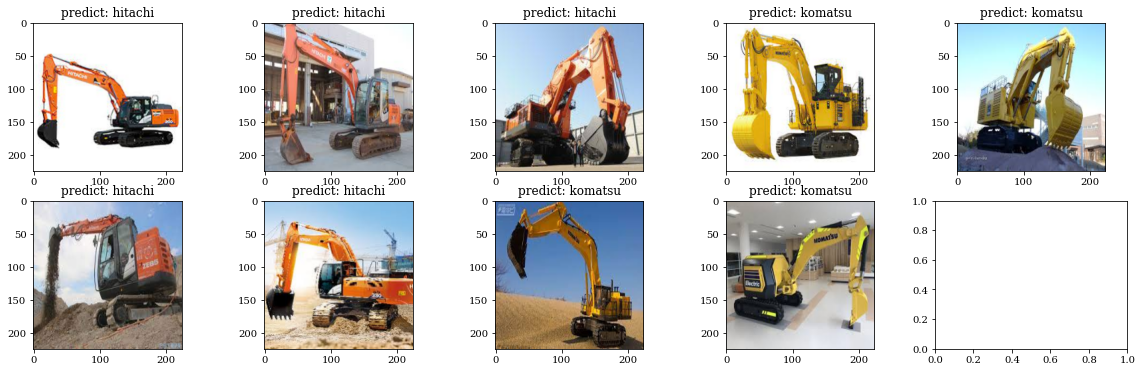

In [99]:
fig, ax = plt.subplots(2,5,figsize=(20,6))
imgs = imgs.astype(int)

for i in range(9):
  ax[i%2][i//2].imshow(imgs[i])
  ax[i%2][i//2].set_title('predict: '+pred[i])